<div class="alert alert-block alert-info"><b></b>
<h1><center> <font color='black'> Homework 06</font></center></h1>
<h2><center> <font color='black'> Brand Value Monitoring, Fairness & Interpretability</font></center></h2>    
<h2><center> <font color='black'> MTAT.03.319 - Business Data Analytics</font></center></h2>
<h2><center> <font color='black'> University of Tartu - Spring 2021</font></center></h2>
</div>

# Homework Instructions

# Homework instructions

- Please provide the names and student IDs of the team-members (Maximum 2 person) in the field "Team mates" below. If you are not working in a team please insert only your name and student ID. 

- The accepted submission formats are Colab links or .ipynb files. If you are submitting Colab links please make sure that the privacy settings for the file is public so we can access your code. 

- The submission will automatically close on <font color='red'>**16 May at 23:59**</font>, so please make sure to submit before the deadline. 

- ONLY one of the teammates should submit the homework. We will grade the homework and the marks and feedback is applied for both the team members. So please communicate with your team member about marks and feedback if you are submit the homework.

- If a question is not clear, please ask us in Moodle ONLY. 

- After you have finished solving the Homework, please restart the Kernel and run all the cells to check if there is any persisting issues. 

- Plagiarism is <font color='red'>**PROHIBITED**</font>. Any form of plagiarism will be dealt according to the university policy (https://www.ut.ee/en/current-students/academic-fraud).


### The homework is divided into four sections and the points are distributed as below:
<pre>
- Brand Value Monitoring        -> 6 points
- Fairness & Interpretability   -> 4 points
__________________________________________
Total                           -> 10 points
</pre>

# 1. Brand Value Monitoring (6 points)
You are going to use two annotated datasets containing tweets about Apple stock (AAPL) and the sentiment it represents (postive, negative, neutral)

**1.1 There are two datasets with 1000 rows each. Please concatenate them together so that you have 2000 rows. (0.2 Points)**

In [ ]:
import pandas as pd
import numpy as np


a1 = pd.read_csv('Apple1.csv', encoding='latin-1') #DO NOT change the encoding method, may give you error
a2 = pd.read_csv('Apple2.csv', encoding='latin-1') #DO NOT change the encoding method, may give you error

#Concatenate
a = pd.concat([a1,a2], ignore_index=True)
a.shape

(2000, 4)

**1.2 Plot a distribution of ```sentiment``` unique values. (0.2 Points)**

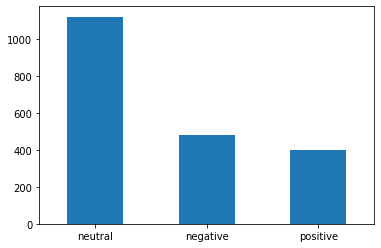

In [ ]:
a.sentiment.value_counts().plot.bar(rot=0)

**1.3 Drop the unecessary column/s. Perform the following preprocessings to the ```text``` column. (1.6 Points)**
- change all characters to lowercase
- remove URLs
- remove words starting with ‘@’
- remove words starting with ‘$’ 
- remove punctuation
- remove stopwords
- remove numbers
- remove whitespaces
Don’t forget to inspect

In [ ]:
a_new = a.copy()

In [ ]:
#Dropping unnecessary columns
a_new = a_new.drop(["created", "id"],axis = 1)

#Change all characters to lowercase
a_new["text"] = a_new["text"].str.lower()

#Remove URLs, Remove words starting with ‘@’
a_new['text'] = a_new['text'].str.replace('http\S+|www.\S+|@\S+', '', case=False)

#Remove words starting with ‘$’
a_new['text'] = a_new['text'].str.replace('$', '')
a_new['text'] = a_new['text'].str.replace('aapl', '', case=False) 
#Removing words starting with $ did not work as the previous one. So, we have discovered that $ is only 
#beginning of aapl word and numbers. So we have deleted the aapl and later we will delete the numbers.

#Remove punctuation
a_new["text"] = a_new["text"].str.replace('[^\w\s]','')

#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop = stopwords.words('english')
a_new['text'] = a_new['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
a_new['text'] = a_new['text'].str.replace('\b\w\b', '')

#Remove numbers
a_new['text'] = a_new.text.str.replace(r'\S*\d\S*','')

#Additional
a_new['text'] = a_new['text'].str.replace('rt', '', case=False)

#Remove whitespaces
a_nowhitespace = a_new.copy()
a_nowhitespace["text"] = a_nowhitespace["text"].str.replace(" ", "")
#We will not use a_nowhitespace. Instead of it we will use a_new
a_nowhitespace
#Reference: https://stackoverflow.com/questions/45395676/remove-a-url-row-by-row-from-a-large-set-of-text-in-python-panda-dataframe


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,text,sentiment
0,beatepsrevenuesseesrevest,positive
1,beatepsrevenuesseesrevest,positive
2,letsseebreaktimers,neutral
3,thingsmightgetuglyiphonedelaymeansalmostfangst...,negative
4,wowsupposedthrowawayquaerbeatsmillionrevenuetr...,neutral
...,...,...
1995,dowjonesindustrialaverageshitsfirsttimeappleop...,positive
1996,whipsawwednesdayviewdowdiadxdoildollar,neutral
1997,applebillioncashcouldbuyuberteslanetflixairbnb...,positive
1998,callspreadprofit,neutral


**1.4 Create wordclouds for each sentiment group. Find out the most frequent word for each group. You should have three plot for three sentiment groups. (1.5 Points)**

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

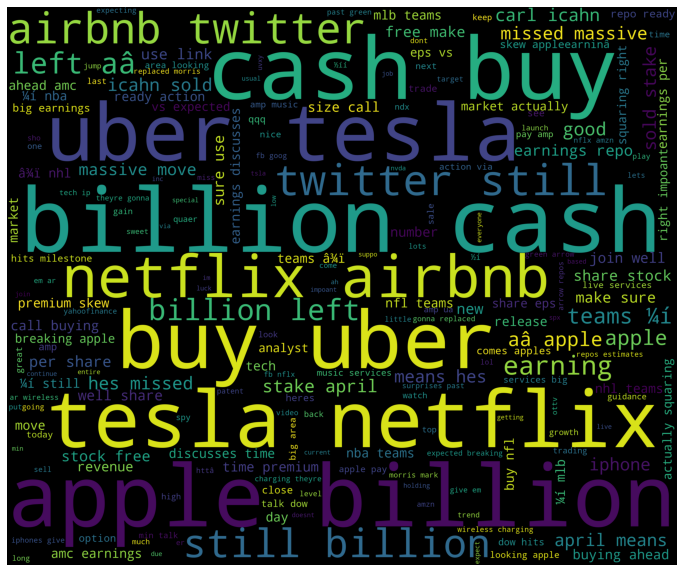

In [ ]:
#Positive
a_positive = a_new[a_new['sentiment']=='positive']
cleaned_word_positive = ' '.join(a_positive['text'])

wordcloud = WordCloud(background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word_positive)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

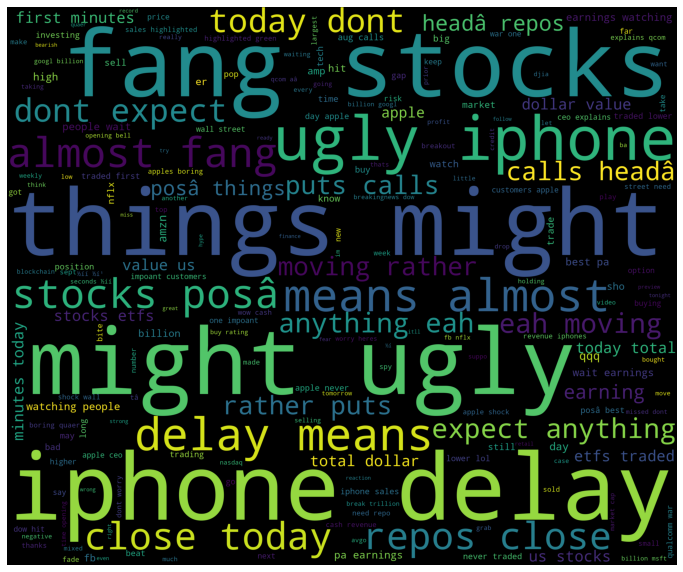

In [ ]:
#Negative
a_negative = a_new[a_new['sentiment']=='negative']
cleaned_word_negative = ' '.join(a_negative['text'])

wordcloud = WordCloud(background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word_negative)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

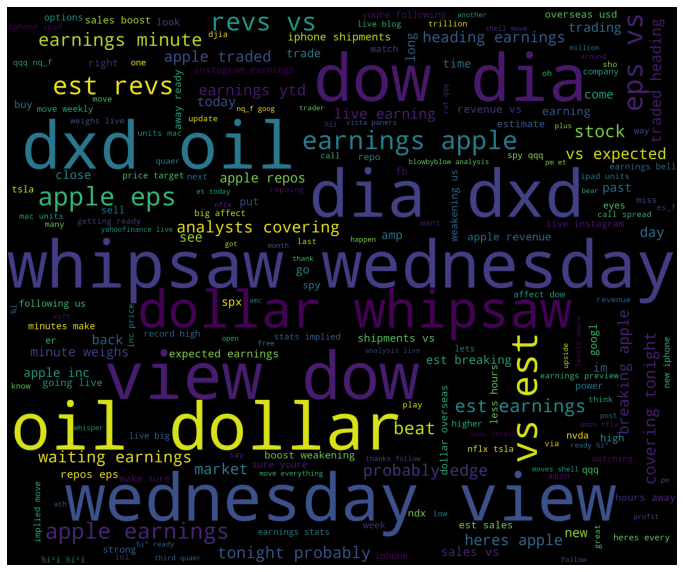

In [ ]:
#Neutral
a_neutral = a_new[a_new['sentiment']=='neutral']
cleaned_word_neutral = ' '.join(a_neutral['text'])

wordcloud = WordCloud(background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word_neutral)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**1.5 Apply TF-IDF technique on the textual data and split the dataset between train and test (80/20 ratio) (1.0 Points)**

In [ ]:
cleaned_data=[]
cleaned_data.append(a_new["text"])

cleaned_data = a_new["text"].values.tolist()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer 

tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words=stop)  
X = tfidfconverter.fit_transform(cleaned_data).toarray()

In [ ]:
#Split
from sklearn.model_selection import train_test_split
y = a_new['sentiment'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**1.6 Train a random forest model with the prepared data and show the classification report on the test data (0.5 Points)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier(n_estimators=100, random_state=0)  
text_classifier.fit(X_train, y_train)
 
 
predictions = text_classifier.predict(X_test)
 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
 
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print(accuracy_score(y_test, predictions))


[[ 80  14   6]
 [  4 224   6]
 [  2  14  50]]
              precision    recall  f1-score   support

    negative       0.93      0.80      0.86       100
     neutral       0.89      0.96      0.92       234
    positive       0.81      0.76      0.78        66

    accuracy                           0.89       400
   macro avg       0.88      0.84      0.85       400
weighted avg       0.89      0.89      0.88       400

0.885


**1.7 Train an SVM model with the prepared data and show the classification report on the test data (0.5 Points)**

In [ ]:
from sklearn.svm import SVC
text_classifier = SVC()
text_classifier.fit(X_train, y_train)
 
predictions = text_classifier.predict(X_test)
 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
 
(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print(accuracy_score(y_test, predictions))


              precision    recall  f1-score   support

    negative       0.97      0.76      0.85       100
     neutral       0.85      0.99      0.91       234
    positive       0.94      0.71      0.81        66

    accuracy                           0.89       400
   macro avg       0.92      0.82      0.86       400
weighted avg       0.90      0.89      0.88       400

0.885


**1.8 Which model performed better? Consider the f1 metrics and the time it took to train the model. Which model would you use in a real-life scenario and why? (0.5 Points)**

**<font color='red'>Answer:</font>** In SVM precision metrics are better, while recall and f1-score metrics are better in random forest. For training the data took almost the same time for each model. So, generally we would use random forest model in real-life because it performance better

# 2. Fairness & Interpretability ( 4 points)

In this section you are going to use the standard German Credit dataset used to bechmark many model interpretability techniques. The daset contains 1000 records of loan applications associatid with a risk score: Good or Bad.

**2.1 The dataset has empty values. Choose an imputation method of your choice for each column. (0.5 points)**

In [ ]:
!pip install sklearn_pandas
from sklearn_pandas import CategoricalImputer
import pandas as pd
german_data = pd.read_csv('german_credit_data.csv', sep=',')


In [ ]:
german_data.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [ ]:
german_data["Saving accounts"].value_counts() #little is most frequent
german_data["Checking account"].value_counts() #little is most frequent

for col in ['Saving accounts', 'Checking account']:
    german_data[col].fillna('litTle', inplace=True)
  

german_data.head()


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,litTle,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,litTle,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


**2.2 Plot the values of the column ```Age``` against the ```Risk``` column. Do you think there exist  bias in this dataset? Choose the appropriate plot to address the problem. (0.5 points)**

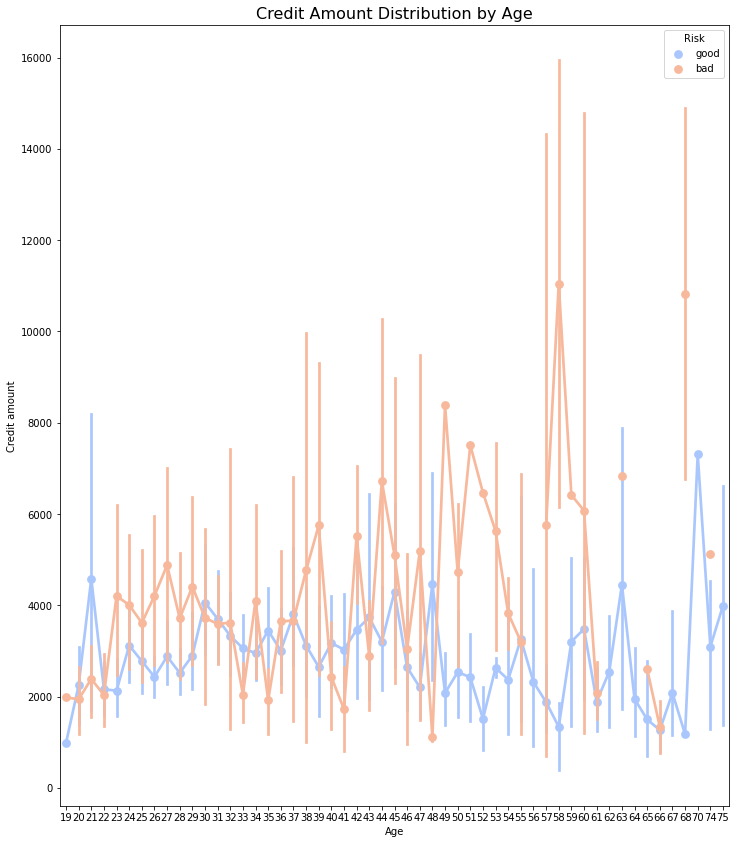

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1) = plt.subplots(1,1, figsize=(12,14))

sns.pointplot(x="Age", y="Credit amount", data=german_data, hue="Risk", palette="coolwarm")

plt.title("Credit Amount Distribution by Age", fontsize=16)


plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 0.9)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


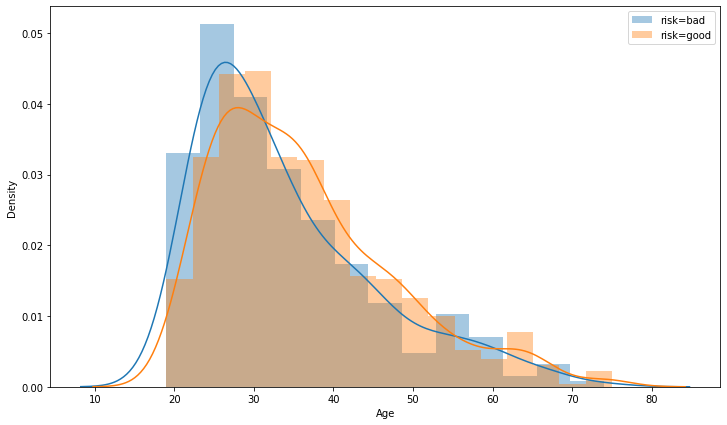

In [ ]:
plt.figure(figsize = (12, 7))
sns.distplot(german_data['Age'][german_data['Risk']=='bad'], label = 'risk=bad')
sns.distplot(german_data['Age'][german_data['Risk']=='good'], label = 'risk=good')
plt.legend()

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


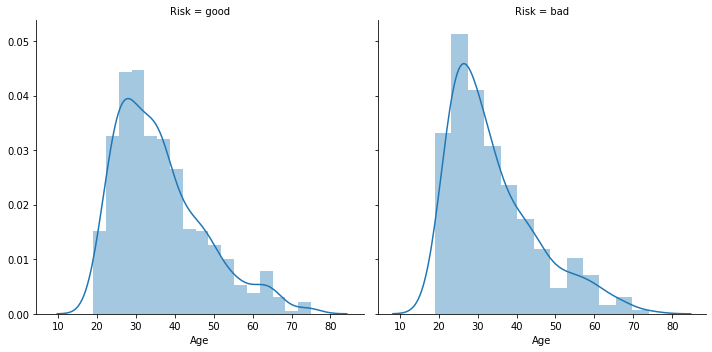

In [ ]:
g = sns.FacetGrid(german_data, col="Risk", height=5, aspect=1)
g.map(sns.distplot, "Age")

<font color='red'> **Answer:** Younger people faces more risks(both types) than older people which seems logically incorrect


**2.3 Perform label encoding. Split the dataset in train/test (80/20 ratio) set, keep the random state 99. Train the XGBoost classifier below and predict the results in test set. Plot the classifcation report. (0.5 points)**

In [ ]:
data=german_data.copy()
cat_cols = data.select_dtypes(['object']).columns
data[cat_cols]= data[cat_cols].astype("category") 
data[cat_cols] = data[cat_cols].apply(lambda x: x.cat.codes)
data.head()


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,0,1,1169,6,5,1
1,22,0,2,1,1,2,5951,48,5,0
2,49,1,1,1,1,0,2096,12,3,1
3,45,1,2,0,1,1,7882,42,4,1
4,53,1,2,0,1,1,4870,24,1,0


In [ ]:
# encoded data set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.loc[:, data.columns != 'Risk']
, data['Risk'],
                                     train_size = 0.8, 
                                     test_size = 0.2, 
                                     random_state = 99)
X_train.shape, X_test.shape

((800, 9), (200, 9))

In [ ]:
%%time

import xgboost as xgb

xgc = xgb.XGBClassifier(n_estimators=500, max_depth=5, base_score=0.5,
                        objective='binary:logistic', random_state=42)
xgc.fit(X_train, y_train)

CPU times: user 351 ms, sys: 32 ms, total: 383 ms
Wall time: 610 ms


In [ ]:
predictions = xgc.predict(X_test)
predictions[:10]

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int8)

In [ ]:

import model_evaluation_utils as meu
class_labels = [0,1]
meu.display_model_performance_metrics(true_labels=y_test, predicted_labels=predictions, classes=class_labels)

Model Performance metrics:
------------------------------
Accuracy: 0.755
Precision: 0.7465
Recall: 0.755
F1 Score: 0.7491

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.62      0.52      0.57        61
           1       0.80      0.86      0.83       139

    accuracy                           0.76       200
   macro avg       0.71      0.69      0.70       200
weighted avg       0.75      0.76      0.75       200



**2.4 Plot 3 types of feature importance (the parameter importance_type='weight', 'gain', 'cover') given by XGBoost and interpret the results. (0.5 points)**

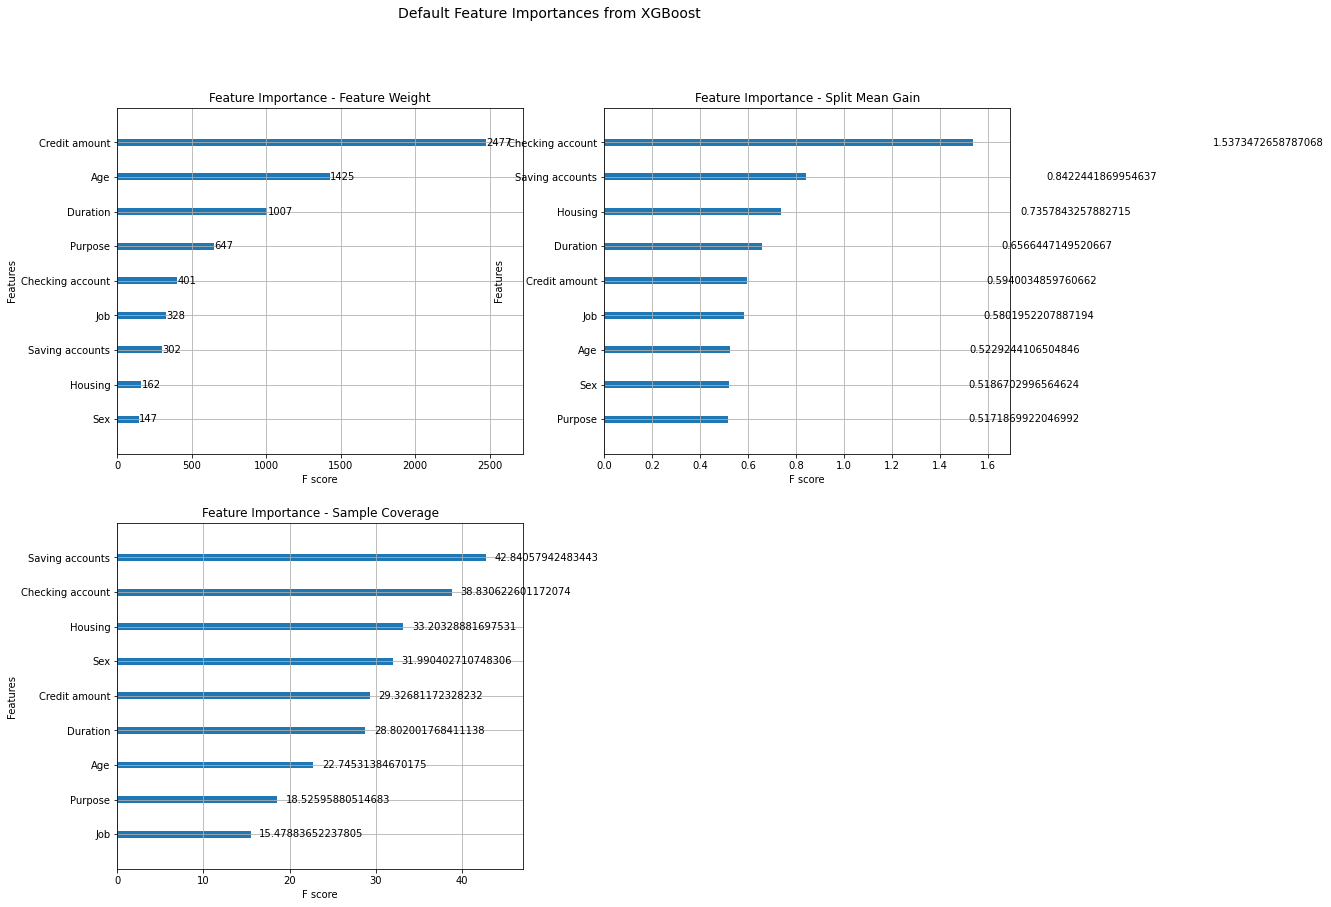

In [ ]:
fig = plt.figure(figsize = (16, 14))
title = fig.suptitle("Default Feature Importances from XGBoost", fontsize=14)

ax1 = fig.add_subplot(2,2, 1)
xgb.plot_importance(xgc, importance_type='weight', ax=ax1)
t=ax1.set_title("Feature Importance - Feature Weight")

ax2 = fig.add_subplot(2,2, 2)
xgb.plot_importance(xgc, importance_type='gain', ax=ax2)
t=ax2.set_title("Feature Importance - Split Mean Gain")

ax3 = fig.add_subplot(2,2, 3)
xgb.plot_importance(xgc, importance_type='cover', ax=ax3)
t=ax3.set_title("Feature Importance - Sample Coverage")

<font color='red'> **Answer:** For the parameter importance_type "Weight" Credit Amount, for type "Gain" Checking account, ad for type "Cover" Saving accounts hold the most ferquent features in our prediction model


**2.5 Use eli5 to analyze the most important features of a sample where the credit score is Bad and another sample where the credit score is Good. Explain briefly the results (0.5 points)**

In [ ]:
!pip install eli5
import eli5

     |████████████████████████████████| 112kB 4.7MB/s 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
eli5.show_weights(xgc.get_booster())

Weight,Feature
0.2363,Checking account
0.1295,Saving accounts
0.1131,Housing
0.1009,Duration
0.0913,Credit amount
0.0892,Job
0.0804,Age
0.0797,Sex
0.0795,Purpose


In [ ]:
y_test_array = y_test.to_numpy() #https://www.w3resource.com/numpy/manipulation/reshape.php

doc_num = 2
print('Actual Label:', y_test_array[doc_num])
print('Predicted Label:', predictions[doc_num])
eli5.show_prediction(xgc.get_booster(), X_test.iloc[doc_num], 
                     feature_names=list(X_test.columns) ,show_feature_values=True)

Actual Label: 1
Predicted Label: 1


<font color='red'>**Answer:** For predicting the good credit score, the most important features are Credit amount,Job, Purpose, Age,Sex, Housing

In [ ]:
doc_num = 1
print('Actual Label:', y_test_array[doc_num])
print('Predicted Label:', predictions[doc_num])
eli5.show_prediction(xgc.get_booster(), X_test.iloc[doc_num], feature_names=list(X_test.columns) ,show_feature_values=True)

Actual Label: 0
Predicted Label: 0


<font color='red'> **Answer:** For predicting bad credit scores, the most important features are Saving Acounts, checking account, Duration, Credit amount and age

**2.6 Use SHAP to explain the prediction of the model for a sample where the credit score is Bad and another sample where the credit score is Good. Explain briefly the results.(0.5 points)**

In [ ]:
!pip install shap
import shap


     |████████████████████████████████| 358kB 6.9MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491621 sha256=b584e96f0efd2f4dcbd2bab3a03d6e2483984686647003102c9f65663f740723
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [ ]:
explainer = shap.TreeExplainer(xgc)
shap_values = explainer.shap_values(X_test)

In [ ]:
pd.DataFrame(shap_values).head()

,0,1,2,3,4,5,6,7,8
0,-0.437969,0.049437,0.387510,0.164317,-0.415169,-0.844856,0.555275,-0.836582,-0.690406
1,-0.858629,0.220425,0.118155,0.160905,-0.315762,-0.936422,-1.297925,-0.788385,-0.032380
2,0.090834,0.346155,0.256782,0.193139,-0.229818,-0.172247,0.772240,-0.871327,0.181412
3,1.393508,0.226452,0.049307,-1.449604,0.293232,2.452924,-0.571917,0.309535,-0.520015
4,-1.584423,-0.840401,0.211529,0.120859,-0.146421,1.130197,-0.413527,-0.761759,-0.098554


In [ ]:
print('Expected Value:', explainer.expected_value)

Expected Value: 0.9581172


In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[2,:], X_test.iloc[2,:])

<font color='red'> **Answer:**
- Reference to the practical session, red color pushing prediction hgiher (1)while blue color makes it lower(0).
- So, for bad credit score, Housng = 1, Job=3, and credit amount = 4.442
- For good credit score, Age = 32, purpose = 1, Housing = 1, Job = 2, Sex=1, creadit ammoun = 6.078
are the most affcetive features



**2.7 Use SHAP to explain the prediction of the model for  the first 250 samples. Based on the similar patterns explain briefly the results(0.5 points)**

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:250,:], X_test.iloc[:250,:])

<font color='red'> **Answer:** 
- For the first 40 and 160-250 samples, probably thy have a good credit scroe and influneced mostly by the credit amount and saving accounts and checknig account (for 0 values)
- Samples between 40 and 160 have a bad credit score because of checking acoount (for 1 values)

**2.8 Plot as a bar chart of the feature importances received from SHAP. Finally compare these results  with the result from 2.6 and 2.7. (0.5 points)**

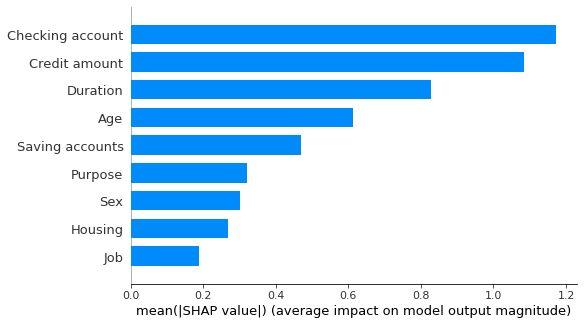

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

<font color='red'> **Answer:** 
- Results does not difffer so much, as regard to the last graphs, credit ammount and age keeps the importance again. Also, checking account is one the main feature which also appered in the graph 2.7


